In [100]:
import requests
from bs4 import BeautifulSoup
import bs4
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import pandas as pd
from io import BytesIO
import re
import gspread
from oauth2client.service_account import ServiceAccountCredentials
from df2gspread import df2gspread as d2g
import datetime
from selenium.webdriver.chrome.options import Options
import numpy as np
import random
from selenium.webdriver import ActionChains
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [101]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [102]:
import warnings
warnings.filterwarnings('ignore')

In [103]:
scope = ['https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name("../creds.json", scope)
client = gspread.authorize(creds)
sheet = client.open("stock data")
sheet = sheet.worksheet("crypto")
df = pd.DataFrame(sheet.get_all_values())
df.columns = df.iloc[0]
df = df.iloc[1:]
df = df.replace('N/A', np.nan)
df= df.dropna()

In [104]:
scope = ['https://www.googleapis.com/auth/drive']
creds = ServiceAccountCredentials.from_json_keyfile_name("../creds.json", scope)
client = gspread.authorize(creds)
sheet = client.open("stock data1")
sheet = sheet.worksheet("crypto")
df1 = pd.DataFrame(sheet.get_all_values())
df1.columns = df1.iloc[0]
df1 = df1.iloc[1:]
df1 = df1.replace('N/A', np.nan)
df1= df1.dropna()


In [105]:
allData = df.append(df1)
allData

,Symbol,Name,Price (Intraday),Change,% Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time
1,BTC-USD,Bitcoin USD,"18,193.88",-142.78,-0.78%,337.809B,26.81B,26.81B,26.81B,18.567M,Thu Dec 10 06:00:06 2020
2,ETH-USD,Ethereum USD,559.09,-2.80,-0.50%,63.61B,11.392B,11.392B,11.392B,113.774M,Thu Dec 10 06:00:06 2020
3,XRP-USD,XRP USD,0.5707,+0.0042,+0.74%,25.885B,11.019B,11.019B,11.019B,45.355B,Thu Dec 10 06:00:06 2020
4,USDT-USD,Tether USD,0.9999,-0.0004,-0.04%,19.752B,45.68B,45.68B,45.68B,19.753B,Thu Dec 10 06:00:06 2020
5,LTC-USD,Litecoin USD,75.30,-1.41,-1.83%,4.974B,3.403B,3.403B,3.403B,66.056M,Thu Dec 10 06:00:06 2020
...,...,...,...,...,...,...,...,...,...,...,...
21017,DASH-USD,Dash USD,64.57,-1.69,-2.56%,598.286M,456.38M,456.38M,456.38M,9.265M,Sun Jan 12 22:30:04 2020
21018,MIOTA-USD,IOTA USD,0.1895,-0.0017,-0.91%,526.801M,4.303M,4.303M,4.303M,2.78B,Sun Jan 12 22:30:04 2020
21019,VET-USD,VeChain USD,0.0055,-0.0000,-0.82%,303.171M,92.798M,92.798M,92.798M,55.455B,Sun Jan 12 22:30:04 2020
21020,XEM-USD,NEM USD,0.0335,-0.0000,-0.00%,301.107M,3.467M,3.467M,3.467M,9B,Sun Jan 12 22:30:04 2020


In [106]:
allData = allData.reset_index()
allData

,index,Symbol,Name,Price (Intraday),Change,% Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time
0,1,BTC-USD,Bitcoin USD,"18,193.88",-142.78,-0.78%,337.809B,26.81B,26.81B,26.81B,18.567M,Thu Dec 10 06:00:06 2020
1,2,ETH-USD,Ethereum USD,559.09,-2.80,-0.50%,63.61B,11.392B,11.392B,11.392B,113.774M,Thu Dec 10 06:00:06 2020
2,3,XRP-USD,XRP USD,0.5707,+0.0042,+0.74%,25.885B,11.019B,11.019B,11.019B,45.355B,Thu Dec 10 06:00:06 2020
3,4,USDT-USD,Tether USD,0.9999,-0.0004,-0.04%,19.752B,45.68B,45.68B,45.68B,19.753B,Thu Dec 10 06:00:06 2020
4,5,LTC-USD,Litecoin USD,75.30,-1.41,-1.83%,4.974B,3.403B,3.403B,3.403B,66.056M,Thu Dec 10 06:00:06 2020
...,...,...,...,...,...,...,...,...,...,...,...,...
25734,21017,DASH-USD,Dash USD,64.57,-1.69,-2.56%,598.286M,456.38M,456.38M,456.38M,9.265M,Sun Jan 12 22:30:04 2020
25735,21018,MIOTA-USD,IOTA USD,0.1895,-0.0017,-0.91%,526.801M,4.303M,4.303M,4.303M,2.78B,Sun Jan 12 22:30:04 2020
25736,21019,VET-USD,VeChain USD,0.0055,-0.0000,-0.82%,303.171M,92.798M,92.798M,92.798M,55.455B,Sun Jan 12 22:30:04 2020
25737,21020,XEM-USD,NEM USD,0.0335,-0.0000,-0.00%,301.107M,3.467M,3.467M,3.467M,9B,Sun Jan 12 22:30:04 2020


In [107]:
allData = allData.drop(columns = ['index'])
allData

,Symbol,Name,Price (Intraday),Change,% Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time
0,BTC-USD,Bitcoin USD,"18,193.88",-142.78,-0.78%,337.809B,26.81B,26.81B,26.81B,18.567M,Thu Dec 10 06:00:06 2020
1,ETH-USD,Ethereum USD,559.09,-2.80,-0.50%,63.61B,11.392B,11.392B,11.392B,113.774M,Thu Dec 10 06:00:06 2020
2,XRP-USD,XRP USD,0.5707,+0.0042,+0.74%,25.885B,11.019B,11.019B,11.019B,45.355B,Thu Dec 10 06:00:06 2020
3,USDT-USD,Tether USD,0.9999,-0.0004,-0.04%,19.752B,45.68B,45.68B,45.68B,19.753B,Thu Dec 10 06:00:06 2020
4,LTC-USD,Litecoin USD,75.30,-1.41,-1.83%,4.974B,3.403B,3.403B,3.403B,66.056M,Thu Dec 10 06:00:06 2020
...,...,...,...,...,...,...,...,...,...,...,...
25734,DASH-USD,Dash USD,64.57,-1.69,-2.56%,598.286M,456.38M,456.38M,456.38M,9.265M,Sun Jan 12 22:30:04 2020
25735,MIOTA-USD,IOTA USD,0.1895,-0.0017,-0.91%,526.801M,4.303M,4.303M,4.303M,2.78B,Sun Jan 12 22:30:04 2020
25736,VET-USD,VeChain USD,0.0055,-0.0000,-0.82%,303.171M,92.798M,92.798M,92.798M,55.455B,Sun Jan 12 22:30:04 2020
25737,XEM-USD,NEM USD,0.0335,-0.0000,-0.00%,301.107M,3.467M,3.467M,3.467M,9B,Sun Jan 12 22:30:04 2020


In [108]:
# allData.to_csv('../crypto.csv',encoding='utf-8', index=False)

In [109]:
df = allData

In [110]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if "," in x:
        x = x.replace(',', '')
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'T' in x:
        if len(x) > 1:
            return float(x.replace('T', '')) * 1000000000
        return 1000000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return float(x)

In [111]:
df["Total Volume All Currencies (24Hr)"] = [value_to_float(x) for x in df["Total Volume All Currencies (24Hr)"]]
df["Volume in Currency (Since 0:00 UTC)"] = [value_to_float(x) for x in df["Volume in Currency (Since 0:00 UTC)"]]
df["Volume in Currency (24Hr)"] = [value_to_float(x) for x in df["Volume in Currency (24Hr)"]]
df['Circulating Supply'] = [value_to_float(x) for x in df['Circulating Supply']]
df['52 Week Range'] = [value_to_float(x) for x in df['52 Week Range']]

In [112]:
df['Change'] = [s.replace(',', '').replace('+', '') for s in df['Change']]
df["Price (Intraday)"] = [s.replace(',', '') for s in df["Price (Intraday)"]]

In [113]:
df['time'] = [datetime.datetime.strptime(s[4:], '%b %d %H:%M:%S %Y') for s in df['time']]

In [114]:
rbh = ['BSV-USD','BTC-USD', 'BCH-USD','LTC-USD','ETH-USD']

In [115]:
df = df.astype({'Change': float, "Price (Intraday)": float, "Total Volume All Currencies (24Hr)": float, "Volume in Currency (Since 0:00 UTC)": float, "Volume in Currency (24Hr)": float, 'Circulating Supply':float,'52 Week Range': float})


In [116]:
df = df.drop(columns = '% Change')

In [117]:
df['day of week'] = [t.weekday() for t in df['time']]
df

,Symbol,Name,Price (Intraday),Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time,day of week
0,BTC-USD,Bitcoin USD,18193.8800,-142.7800,3.378090e+11,2.681000e+10,2.681000e+10,2.681000e+10,1.856700e+07,2020-12-10 06:00:06,3
1,ETH-USD,Ethereum USD,559.0900,-2.8000,6.361000e+10,1.139200e+10,1.139200e+10,1.139200e+10,1.137740e+08,2020-12-10 06:00:06,3
2,XRP-USD,XRP USD,0.5707,0.0042,2.588500e+10,1.101900e+10,1.101900e+10,1.101900e+10,4.535500e+10,2020-12-10 06:00:06,3
3,USDT-USD,Tether USD,0.9999,-0.0004,1.975200e+10,4.568000e+10,4.568000e+10,4.568000e+10,1.975300e+10,2020-12-10 06:00:06,3
4,LTC-USD,Litecoin USD,75.3000,-1.4100,4.974000e+09,3.403000e+09,3.403000e+09,3.403000e+09,6.605600e+07,2020-12-10 06:00:06,3
...,...,...,...,...,...,...,...,...,...,...,...
25734,DASH-USD,Dash USD,64.5700,-1.6900,5.982860e+08,4.563800e+08,4.563800e+08,4.563800e+08,9.265000e+06,2020-01-12 22:30:04,6
25735,MIOTA-USD,IOTA USD,0.1895,-0.0017,5.268010e+08,4.303000e+06,4.303000e+06,4.303000e+06,2.780000e+09,2020-01-12 22:30:04,6
25736,VET-USD,VeChain USD,0.0055,-0.0000,3.031710e+08,9.279800e+07,9.279800e+07,9.279800e+07,5.545500e+10,2020-01-12 22:30:04,6
25737,XEM-USD,NEM USD,0.0335,-0.0000,3.011070e+08,3.467000e+06,3.467000e+06,3.467000e+06,9.000000e+09,2020-01-12 22:30:04,6


In [118]:
df['hour of day'] = [t.hour for t in df['time']]
df
df = df[df['hour of day'] != 22]


In [119]:
df['timedelta'] = [(datetime.datetime.now() - x).total_seconds() for x in df['time']]

In [120]:
df['6 hour diff'] = df.groupby('Symbol')['Price (Intraday)'].diff() * -1

In [121]:
df['% 6 hour diff'] = df['6 hour diff']/ (df['Price (Intraday)'] - df['6 hour diff']) * 100

In [122]:
oneHotDOW = pd.get_dummies(df['day of week'],prefix='dow')
oHDOWcols = oneHotDOW.columns


In [123]:
df[list(oHDOWcols)] = oneHotDOW

In [124]:
oneHotHOD = pd.get_dummies(df['hour of day'],prefix='hod')
oHHODcols = oneHotHOD.columns

In [125]:
df[list(oHHODcols )] = oneHotHOD

In [126]:
dfNoOH = df.iloc[:,:15]
dfNoOH 

,Symbol,Name,Price (Intraday),Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time,day of week,hour of day,timedelta,6 hour diff,% 6 hour diff
0,BTC-USD,Bitcoin USD,18193.8800,-142.7800,3.378090e+11,2.681000e+10,2.681000e+10,2.681000e+10,1.856700e+07,2020-12-10 06:00:06,3,6,2.169858e+04,NaN,NaN
1,ETH-USD,Ethereum USD,559.0900,-2.8000,6.361000e+10,1.139200e+10,1.139200e+10,1.139200e+10,1.137740e+08,2020-12-10 06:00:06,3,6,2.169858e+04,NaN,NaN
2,XRP-USD,XRP USD,0.5707,0.0042,2.588500e+10,1.101900e+10,1.101900e+10,1.101900e+10,4.535500e+10,2020-12-10 06:00:06,3,6,2.169858e+04,NaN,NaN
3,USDT-USD,Tether USD,0.9999,-0.0004,1.975200e+10,4.568000e+10,4.568000e+10,4.568000e+10,1.975300e+10,2020-12-10 06:00:06,3,6,2.169858e+04,NaN,NaN
4,LTC-USD,Litecoin USD,75.3000,-1.4100,4.974000e+09,3.403000e+09,3.403000e+09,3.403000e+09,6.605600e+07,2020-12-10 06:00:06,3,6,2.169858e+04,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25714,DASH-USD,Dash USD,64.8100,-1.4600,6.004830e+08,4.528090e+08,4.528090e+08,4.528090e+08,9.265000e+06,2020-01-13 00:00:08,0,0,2.872810e+07,0.4800,0.746153
25715,MIOTA-USD,IOTA USD,0.1885,-0.0028,5.239890e+08,4.328000e+06,4.328000e+06,4.328000e+06,2.780000e+09,2020-01-13 00:00:08,0,0,2.872810e+07,-0.0006,-0.317292
25716,VET-USD,VeChain USD,0.0055,-0.0001,3.027000e+08,9.091300e+07,9.091300e+07,9.091300e+07,5.545500e+10,2020-01-13 00:00:08,0,0,2.872810e+07,-0.0001,-1.785714
25717,XEM-USD,NEM USD,0.0334,-0.0001,3.003970e+08,3.457000e+06,3.457000e+06,3.457000e+06,9.000000e+09,2020-01-13 00:00:08,0,0,2.872810e+07,-0.0001,-0.298507


In [127]:
df = df.drop(columns = 'hour of day')
df = df.drop(columns = 'day of week')

In [128]:
eth = dfNoOH[dfNoOH['Symbol'] == 'ETH-USD']
eth

,Symbol,Name,Price (Intraday),Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time,day of week,hour of day,timedelta,6 hour diff,% 6 hour diff
1,ETH-USD,Ethereum USD,559.09,-2.80,6.361000e+10,1.139200e+10,1.139200e+10,1.139200e+10,113774000.0,2020-12-10 06:00:06,3,6,2.169858e+04,NaN,NaN
21,ETH-USD,Ethereum USD,563.98,-4.48,6.416400e+10,1.283300e+10,1.283300e+10,1.283300e+10,113770000.0,2020-12-10 00:00:04,3,0,4.330058e+04,-4.89,-0.859599
41,ETH-USD,Ethereum USD,569.41,3.62,6.478000e+10,1.526700e+10,1.526700e+10,1.526700e+10,113768000.0,2020-12-09 18:00:04,2,18,6.490058e+04,-5.43,-0.944611
61,ETH-USD,Ethereum USD,573.53,0.84,6.524800e+10,1.586000e+10,1.586000e+10,1.586000e+10,113767000.0,2020-12-09 12:00:44,2,12,8.646059e+04,-4.12,-0.713235
81,ETH-USD,Ethereum USD,571.12,7.37,6.497100e+10,1.791300e+10,1.791300e+10,1.791300e+10,113761000.0,2020-12-09 06:00:06,2,6,1.080986e+05,2.41,0.423766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25620,ETH-USD,Ethereum USD,149.64,5.51,1.635100e+10,9.933000e+09,9.933000e+09,9.933000e+09,109271000.0,2020-01-14 00:00:06,1,0,2.864170e+07,3.78,2.591526
25640,ETH-USD,Ethereum USD,147.27,3.13,1.609200e+10,9.062000e+09,9.062000e+09,9.062000e+09,109267000.0,2020-01-13 18:00:05,0,18,2.866330e+07,2.37,1.635611
25660,ETH-USD,Ethereum USD,143.94,-2.85,1.572700e+10,8.288000e+09,8.288000e+09,8.288000e+09,109264000.0,2020-01-13 12:00:06,0,12,2.868490e+07,3.33,2.368253
25680,ETH-USD,Ethereum USD,143.64,-3.15,1.569400e+10,8.460000e+09,8.460000e+09,8.460000e+09,109261000.0,2020-01-13 06:00:06,0,6,2.870650e+07,0.30,0.209293


In [129]:
#NORMALIZE
# columnsNorm =['Price (Intraday)', 'Change', 'Volume in Currency (Since 0:00 UTC)', 'Volume in Currency (24Hr)', 'Total Volume All Currencies (24Hr)', 'Circulating Supply', '52 Week Range']
# dfNoOH[columnsNorm] = dfNoOH[columnsNorm].apply(lambda x: (x - x.min()) / (x.max()  - x.min()))
# dfNoOH

In [130]:
#REMOVE IF PREDICTING
# dfNoOH = dfNoOH.dropna()

In [131]:
eth

,Symbol,Name,Price (Intraday),Change,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,time,day of week,hour of day,timedelta,6 hour diff,% 6 hour diff
1,ETH-USD,Ethereum USD,559.09,-2.80,6.361000e+10,1.139200e+10,1.139200e+10,1.139200e+10,113774000.0,2020-12-10 06:00:06,3,6,2.169858e+04,NaN,NaN
21,ETH-USD,Ethereum USD,563.98,-4.48,6.416400e+10,1.283300e+10,1.283300e+10,1.283300e+10,113770000.0,2020-12-10 00:00:04,3,0,4.330058e+04,-4.89,-0.859599
41,ETH-USD,Ethereum USD,569.41,3.62,6.478000e+10,1.526700e+10,1.526700e+10,1.526700e+10,113768000.0,2020-12-09 18:00:04,2,18,6.490058e+04,-5.43,-0.944611
61,ETH-USD,Ethereum USD,573.53,0.84,6.524800e+10,1.586000e+10,1.586000e+10,1.586000e+10,113767000.0,2020-12-09 12:00:44,2,12,8.646059e+04,-4.12,-0.713235
81,ETH-USD,Ethereum USD,571.12,7.37,6.497100e+10,1.791300e+10,1.791300e+10,1.791300e+10,113761000.0,2020-12-09 06:00:06,2,6,1.080986e+05,2.41,0.423766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25620,ETH-USD,Ethereum USD,149.64,5.51,1.635100e+10,9.933000e+09,9.933000e+09,9.933000e+09,109271000.0,2020-01-14 00:00:06,1,0,2.864170e+07,3.78,2.591526
25640,ETH-USD,Ethereum USD,147.27,3.13,1.609200e+10,9.062000e+09,9.062000e+09,9.062000e+09,109267000.0,2020-01-13 18:00:05,0,18,2.866330e+07,2.37,1.635611
25660,ETH-USD,Ethereum USD,143.94,-2.85,1.572700e+10,8.288000e+09,8.288000e+09,8.288000e+09,109264000.0,2020-01-13 12:00:06,0,12,2.868490e+07,3.33,2.368253
25680,ETH-USD,Ethereum USD,143.64,-3.15,1.569400e+10,8.460000e+09,8.460000e+09,8.460000e+09,109261000.0,2020-01-13 06:00:06,0,6,2.870650e+07,0.30,0.209293


In [132]:
# eth = eth.drop(['6 hour diff', '% 6 hour diff'], axis = 1)
eth = eth.sort_values('time')

In [133]:
eth = eth.groupby('time')['Price (Intraday)'].sum().reset_index()


In [134]:
eth = eth.set_index('time')
eth

,Price (Intraday)
time,
2020-01-13 00:00:08,143.82
2020-01-13 06:00:06,143.64
2020-01-13 12:00:06,143.94
2020-01-13 18:00:05,147.27
2020-01-14 00:00:06,149.64
...,...
2020-12-09 06:00:06,571.12
2020-12-09 12:00:44,573.53
2020-12-09 18:00:04,569.41


In [135]:
eth

,Price (Intraday)
time,
2020-01-13 00:00:08,143.82
2020-01-13 06:00:06,143.64
2020-01-13 12:00:06,143.94
2020-01-13 18:00:05,147.27
2020-01-14 00:00:06,149.64
...,...
2020-12-09 06:00:06,571.12
2020-12-09 12:00:44,573.53
2020-12-09 18:00:04,569.41


In [136]:
y = eth.resample('6h').mean()

In [137]:
y

,Price (Intraday)
time,
2020-01-13 00:00:00,143.82
2020-01-13 06:00:00,143.64
2020-01-13 12:00:00,143.94
2020-01-13 18:00:00,147.27
2020-01-14 00:00:00,149.64
...,...
2020-12-09 06:00:00,571.12
2020-12-09 12:00:00,573.53
2020-12-09 18:00:00,569.41


In [138]:
# y = eth.resample('D').mean()

In [139]:
y.isnull().sum()

Price (Intraday)    120
dtype: int64

In [140]:
ps =list(y['Price (Intraday)'])

In [141]:
x = 5

In [142]:
from statistics import mean 

In [143]:
import math

In [144]:
newPs = []
for x in range(len(list(y['Price (Intraday)']))):
    if math.isnan(ps[x]):
        newPs.append(np.nanmean(ps[x - 5:x + 5]))
    else:
        newPs.append(ps[x])

In [145]:
y['Price (Intraday)'] = newPs

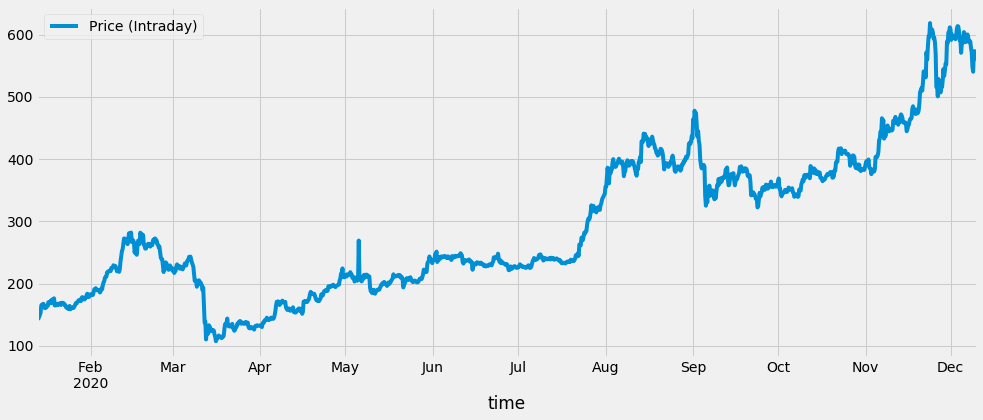

In [146]:
y.plot(figsize=(15, 6))
plt.show()

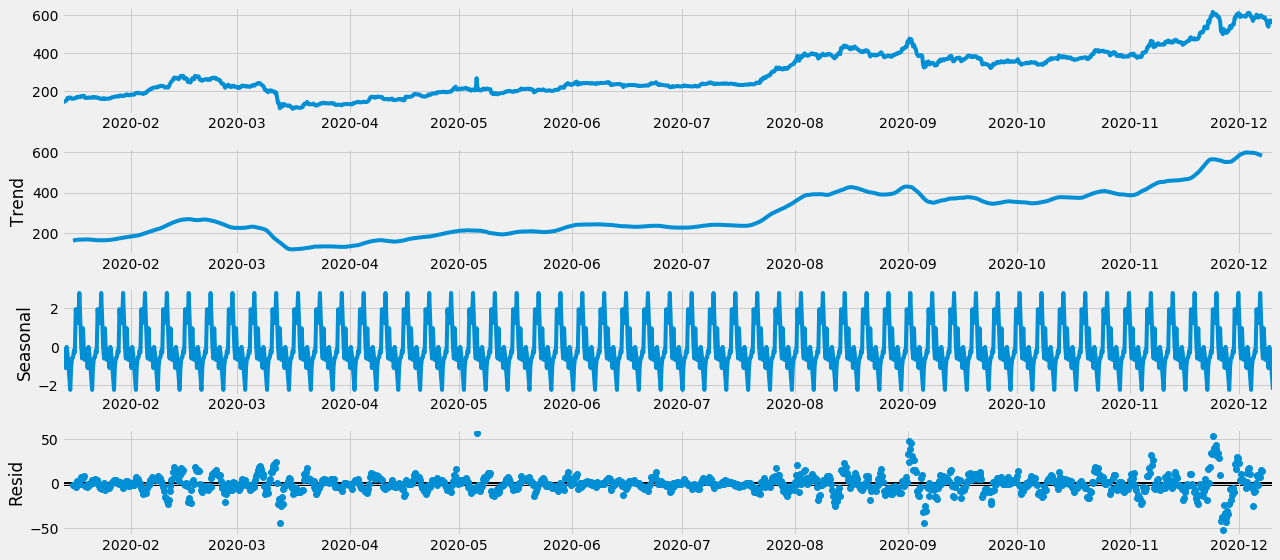

In [147]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [148]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [149]:
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(y,
#                     order=param,
#                     seasonal_order=param_seasonal,
#                     enforce_stationarity=False,
#                     enforce_invertibility=False)
#             results = mod.fit()
#             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#         except:
#             continue

In [150]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 0, 1),
                                seasonal_order=(1, 2, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7761      0.012     63.632      0.000       0.752       0.800
ar.S.L12      -0.3435      0.464     -0.740      0.459      -1.253       0.566
ma.S.L12      -0.8409      0.463     -1.817      0.069      -1.748       0.066
ma.S.L24      -0.2670      0.546     -0.489      0.625      -1.337       0.802
ma.S.L36       0.1205      0.084      1.426      0.154      -0.045       0.286
sigma2       267.2818      6.618     40.387      0.000     254.311     280.253


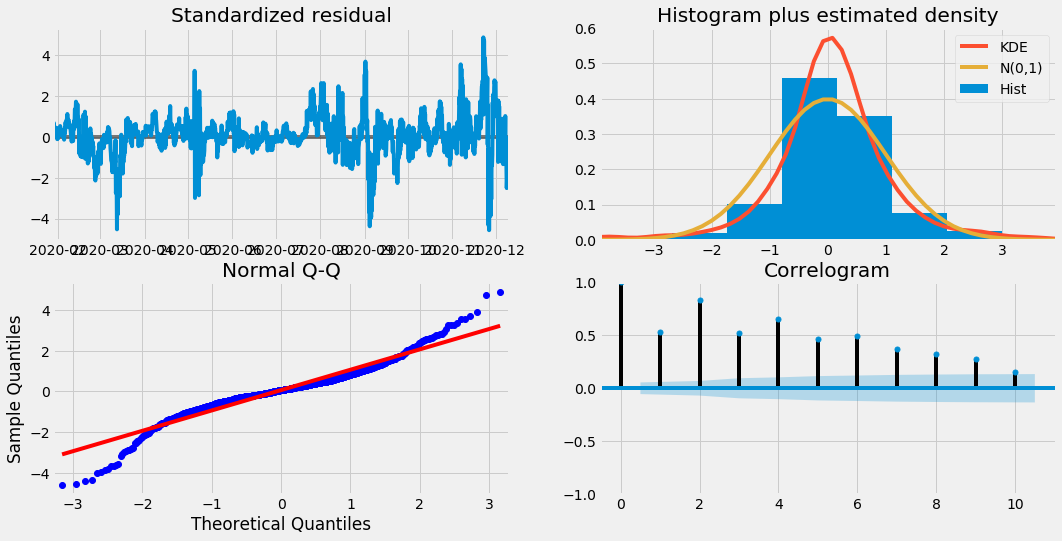

In [151]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

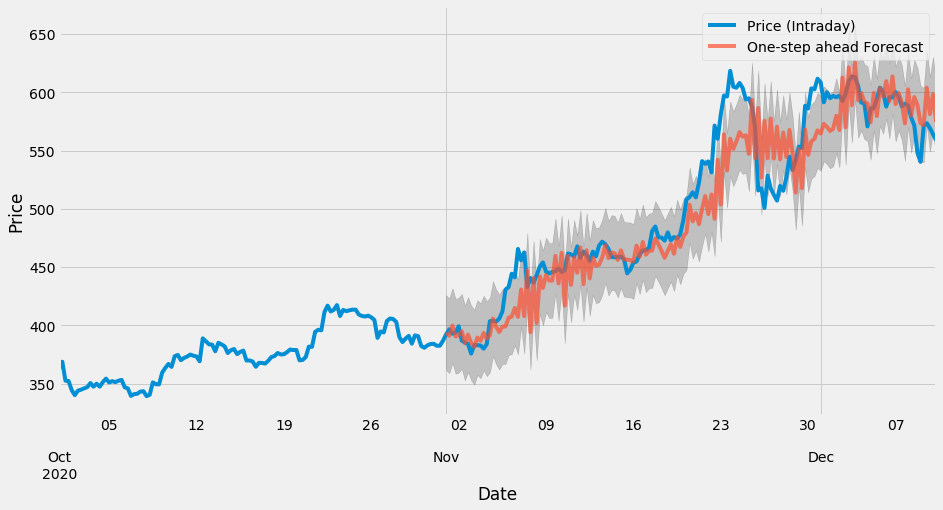

In [152]:
pred = results.get_prediction(start=pd.to_datetime('2020-11-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2020-10-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

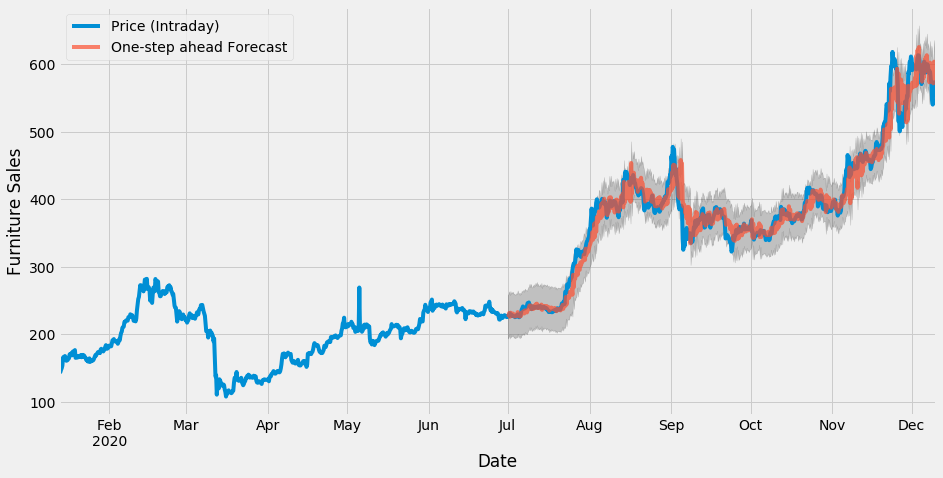

In [153]:
pred = results.get_prediction(start=pd.to_datetime('2020-07-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [154]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-07-01':]
mse = ((y_forecasted.tolist() - y_truth['Price (Intraday)']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 374.3


In [155]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 19.35


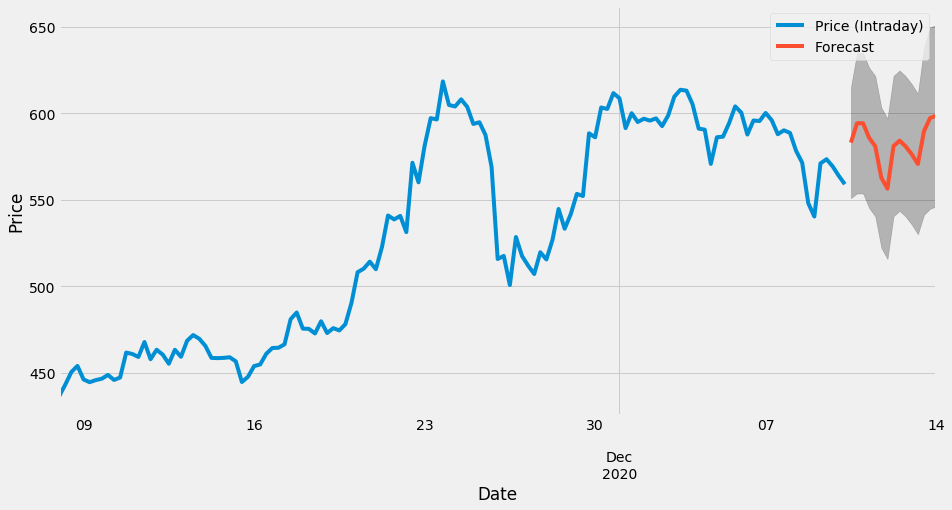

In [156]:
pred_uc = results.get_forecast(steps=15)
pred_ci = pred_uc.conf_int()
ax = y[1200:].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

In [157]:
from fbprophet import Prophet

In [158]:
a = y

In [159]:
y = y.reset_index()

In [160]:
y = y.rename(columns={'time':'ds', 'Price (Intraday)':'y'})
b = y

In [161]:
y = y[y['ds'] > '2020-10-01']

In [162]:
model = Prophet(interval_width=0.95)
model.fit(b)

forecast = model.make_future_dataframe(periods=36, freq='6h')
forecast = model.predict(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


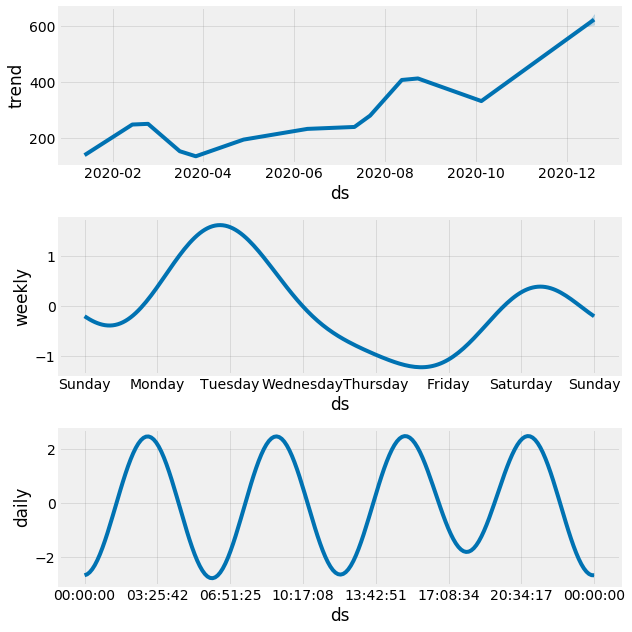

In [163]:
model.plot_components(forecast);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

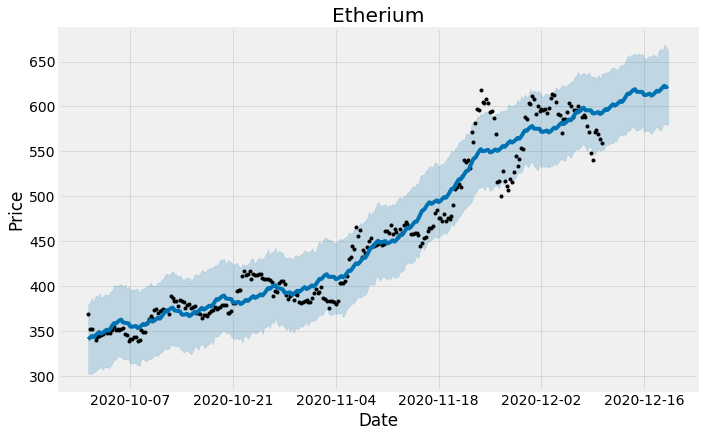

In [164]:

model = Prophet(interval_width=0.95)
model.fit(y)
forecast = model.make_future_dataframe(periods=36, freq='6h')
forecast = model.predict(forecast)
plt.figure(figsize=(18, 6))
model.plot(forecast, xlabel = 'Date', ylabel = 'Price')
plt.title('Etherium');